# AllLife Bank Customer Segmentation

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. 

## Objective

We will identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

* **Sl_No**: Primary key of the records
* **Customer Key**: Customer identification number
* **Average Credit Limit**: Average credit limit of each customer for all credit cards
* **Total credit cards**: Total number of credit cards possessed by the customer
* **Total visits bank**: Total number of Visits that customer made (yearly) personally to the bank
* **Total visits online**: Total number of visits or online logins made by the customer (yearly)
* **Total calls made**: Total number of calls made by the customer to the bank or its customer service department (yearly)


## Import Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_excel("Credit Card Customer Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(660, 7)

<IPython.core.display.Javascript object>

* The dataset has 660 rows and 7 columns

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


<IPython.core.display.Javascript object>

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# dropping the ID no. column as it does not provide any information
df.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
df.drop("Customer Key", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [8]:
# let's check for duplicate observations
df.duplicated().sum()

11

<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


<IPython.core.display.Javascript object>

* No missing values in the dataset.
* Each variable is of the *int* type (integer).

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

* The average credit limit is about \$34,574.
* The median credit limit is \$18,000.
* The average number of credit cards is ~5.

In [11]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Avg_Credit_Limit' are 

 [100000  50000  30000  20000  15000   5000   3000  10000  13000  11000
   9000   6000   8000  19000  16000  18000  17000  14000  12000   7000
  73000  49000  67000  61000  75000  48000  56000  72000  70000  51000
  69000  40000  44000  31000  37000  65000  46000  74000  58000  39000
  52000  33000  47000  71000  41000  59000  64000  45000  54000  66000
  27000  43000  36000  25000  57000  26000  38000  35000  34000  28000
  63000  29000  68000  42000  62000  32000  60000  55000 157000  94000
 163000 131000  96000 136000 121000 158000 108000 166000 176000 178000
  91000 156000 146000  84000 155000 200000 195000 187000 106000 114000
 126000 173000 153000 184000 123000 144000  97000  98000 127000 171000
 186000 183000 111000 112000 132000  95000 172000  99000 145000 167000]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Total_Credit_Cards' are 

 [ 2  3 

<IPython.core.display.Javascript object>

**Observations**
* No values seem to be out of place. No negative values or unexplained zero values.

## Exploratory Data Analysis

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

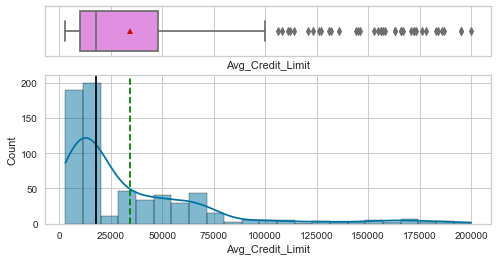

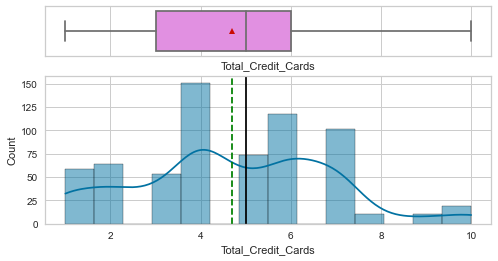

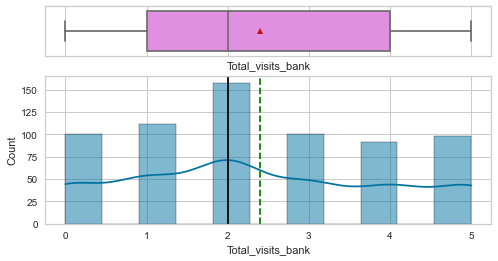

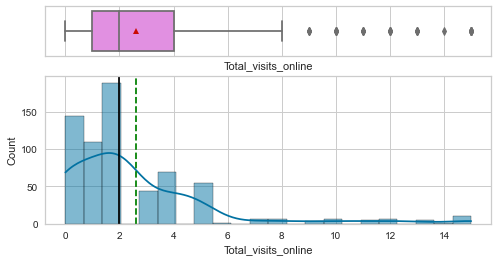

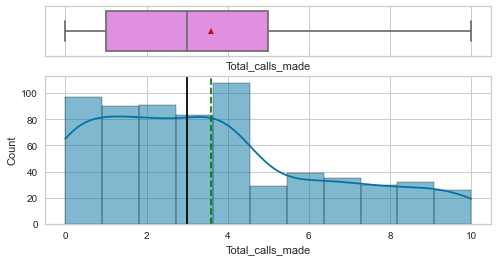

<IPython.core.display.Javascript object>

In [13]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

### Observations
* Most customers have credit card limits under \\$25,000.
* Most customers have 4 credit cards, followed by 6 and 7 cards.
* Most customers only visit the bank twice a year.
* Most customers login twice a year.
* Most customers make 4 calls to the bank per year.
* There are outlier values in average credit limit and total visits online.

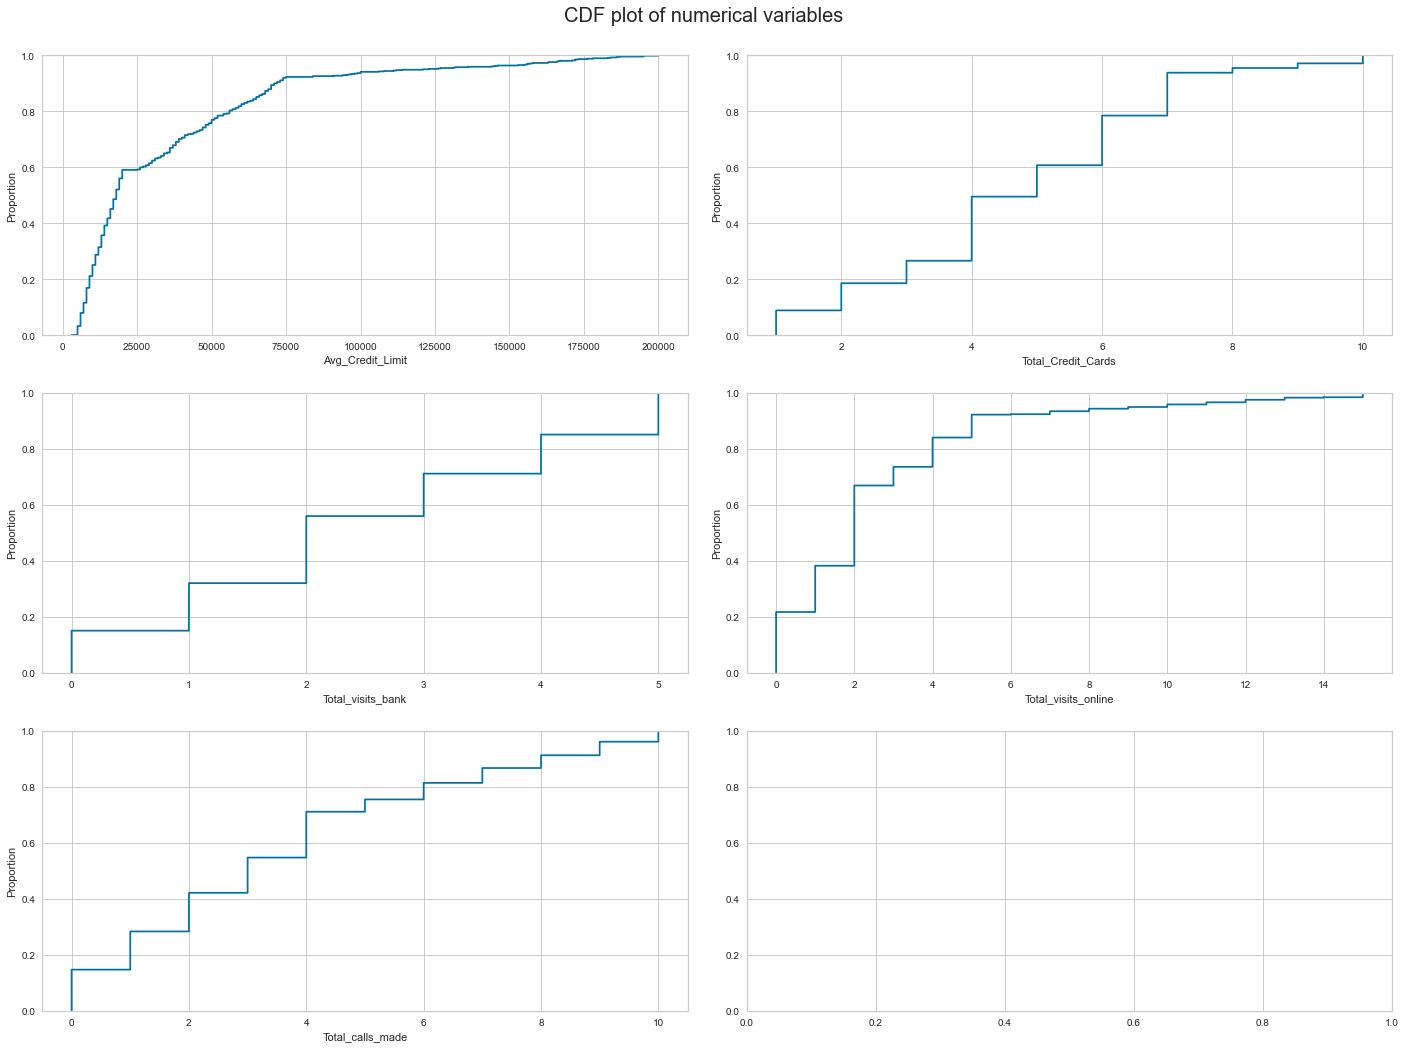

<IPython.core.display.Javascript object>

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

#### Observations

- 90% of Avg_Credit_Limit is under \$75,000.
- 90% of customers visit online less than 5 times.

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

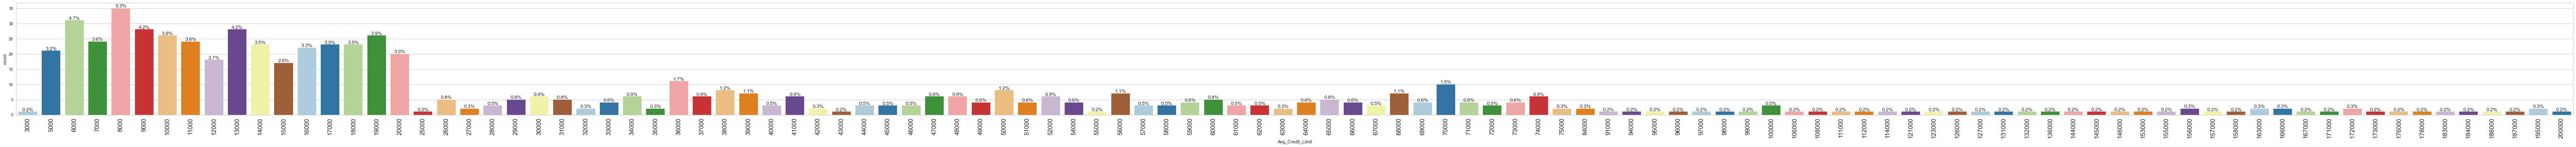

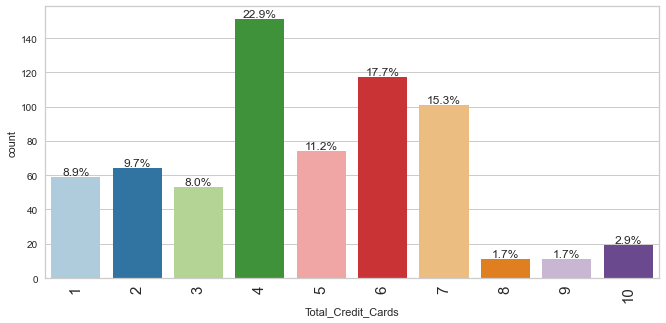

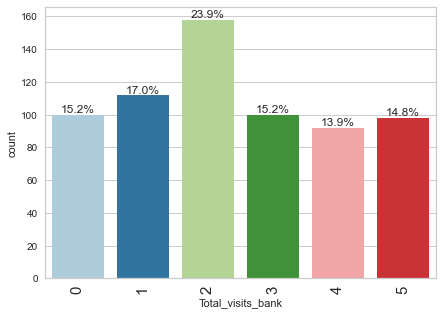

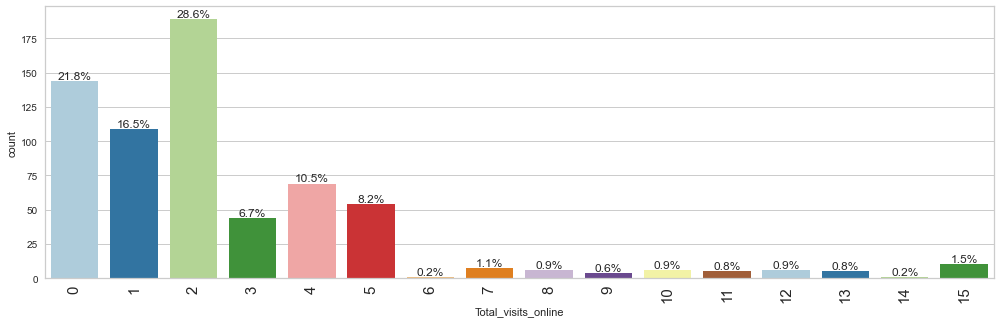

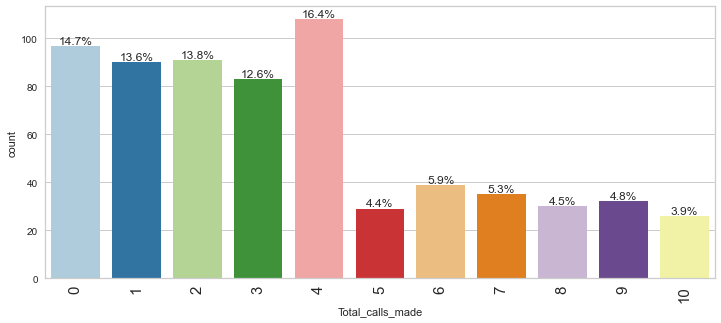

<IPython.core.display.Javascript object>

In [16]:
for item in num_col:
    labeled_barplot(df, item, perc=True)

- 22.9% of customers have 4 credit cards.
- 23.9% of customers have made 2 visits to the bank, and 28.6% have made 2 visits online.
- 16.4% of customers have made 4 calls to the bank.

### Bivariate Analysis

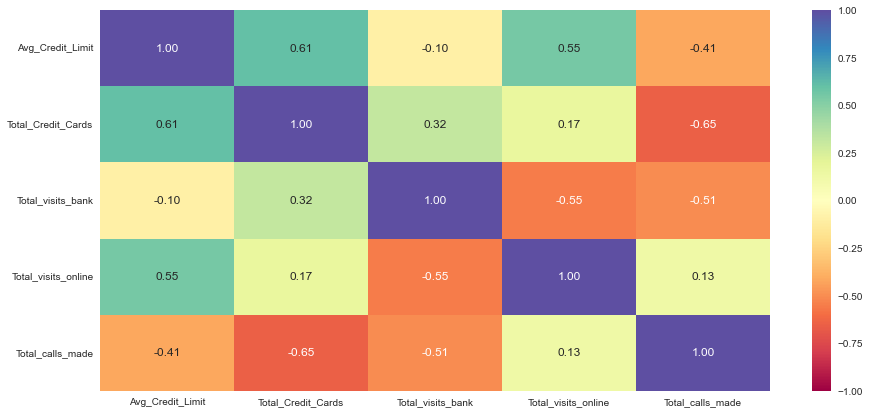

<IPython.core.display.Javascript object>

In [17]:
# checking for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Insights 

* Total credit cards and avg credit limit are positively correlated, more cards would equal larger overall credit limits.
* Total visits online and avg credit limit are positively correlated.
* Total calls made and total credit cards are negatively correlated. The more cards a customer has the less they call the bank.
* Total visits online and total visits to the bank are negatively correlated. If an issue can be addressed online, there is no need to go into the bank.

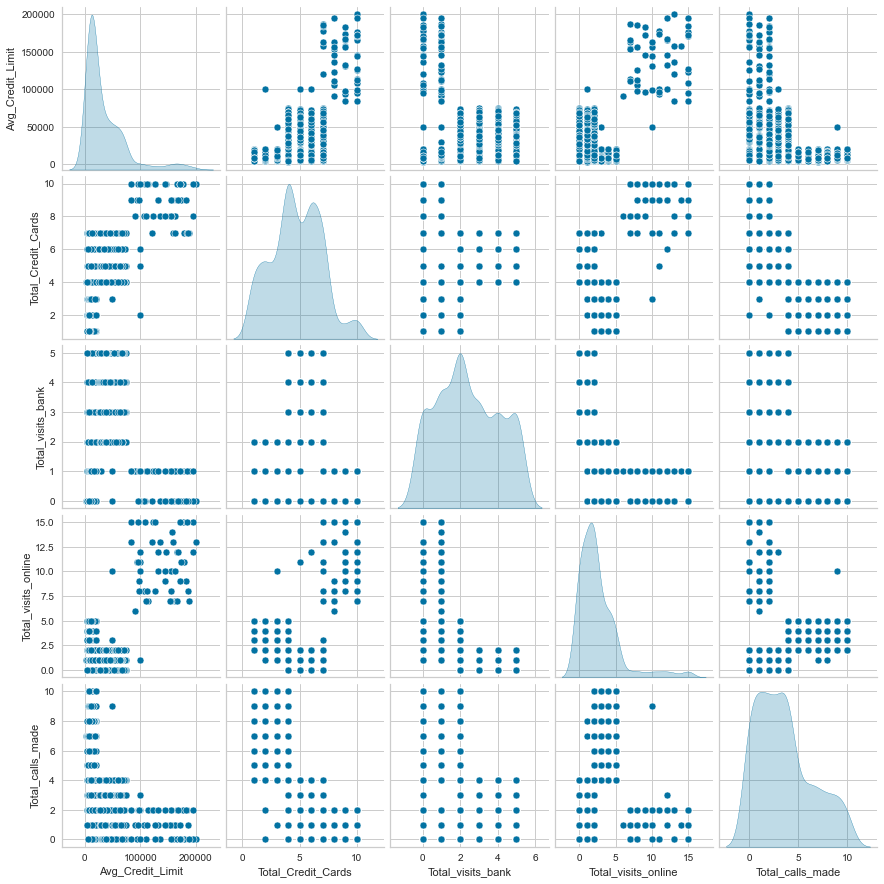

<IPython.core.display.Javascript object>

In [18]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

### Insights

* The distribution of total credit cards and total, total visits bank and total calls made appear to be mulitmodal.
* The distribution of avg credit limit and total visits online are skewed to the right.

## Data Preprocessing

In [19]:
# variables used for clustering
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

<IPython.core.display.Javascript object>

In [20]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [21]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-Means Clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429882588535909
Number of Clusters: 7 	Average Distortion: 0.9095086187180526
Number of Clusters: 8 	Average Distortion: 0.8902027572648549


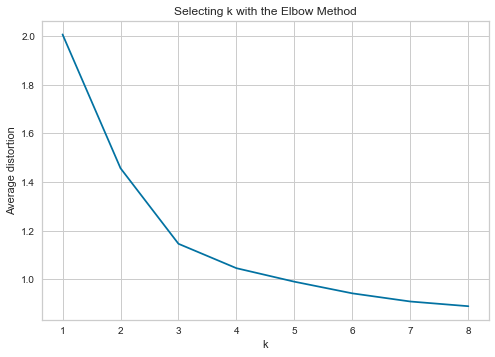

<IPython.core.display.Javascript object>

In [22]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Appropriate value for k seems to be 3 or 4.**

#### Let's check the silhouette scores.

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.2554668170859757
For n_clusters = 7, silhouette score is 0.248175083050816
For n_clusters = 8, silhouette score is 0.22743427223189372
For n_clusters = 9, silhouette score is 0.2200370017157068


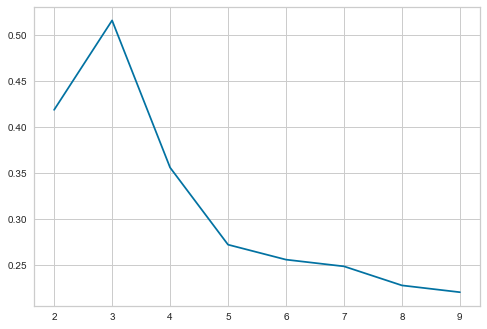

<IPython.core.display.Javascript object>

In [23]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 3 is a good value of k.**

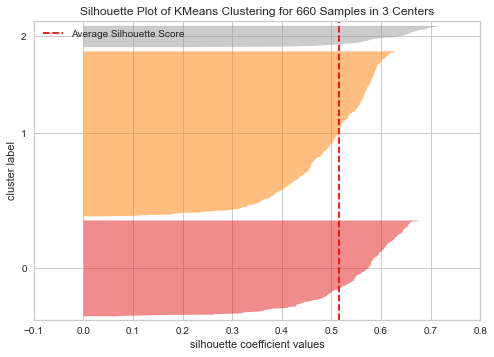

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [24]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

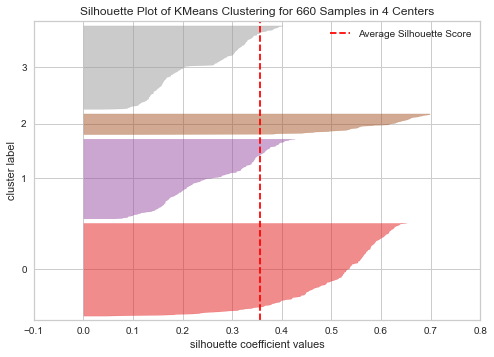

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [25]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

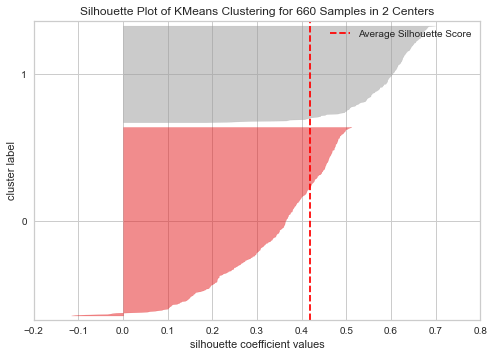

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [26]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

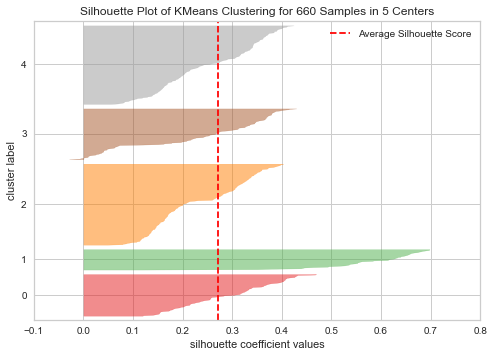

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [27]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Let's take 3 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 3 in the elbow curve.**

In [28]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [29]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [30]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [31]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [32]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

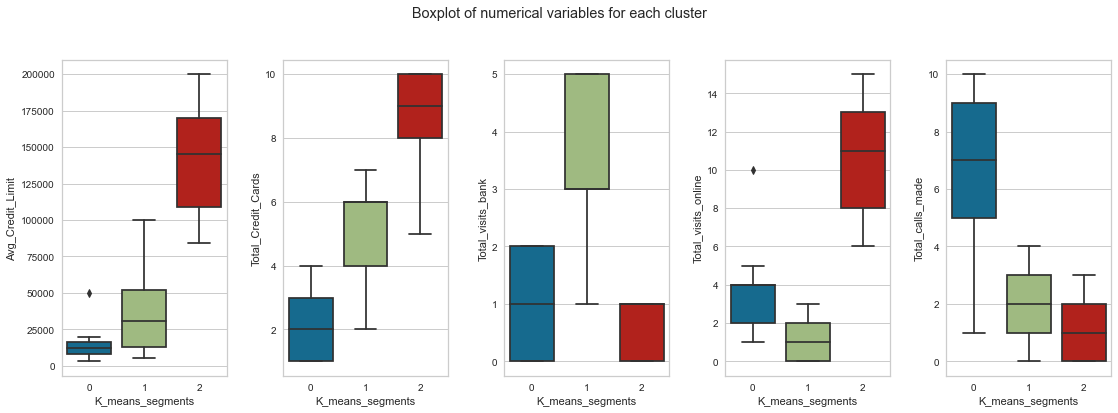

<IPython.core.display.Javascript object>

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

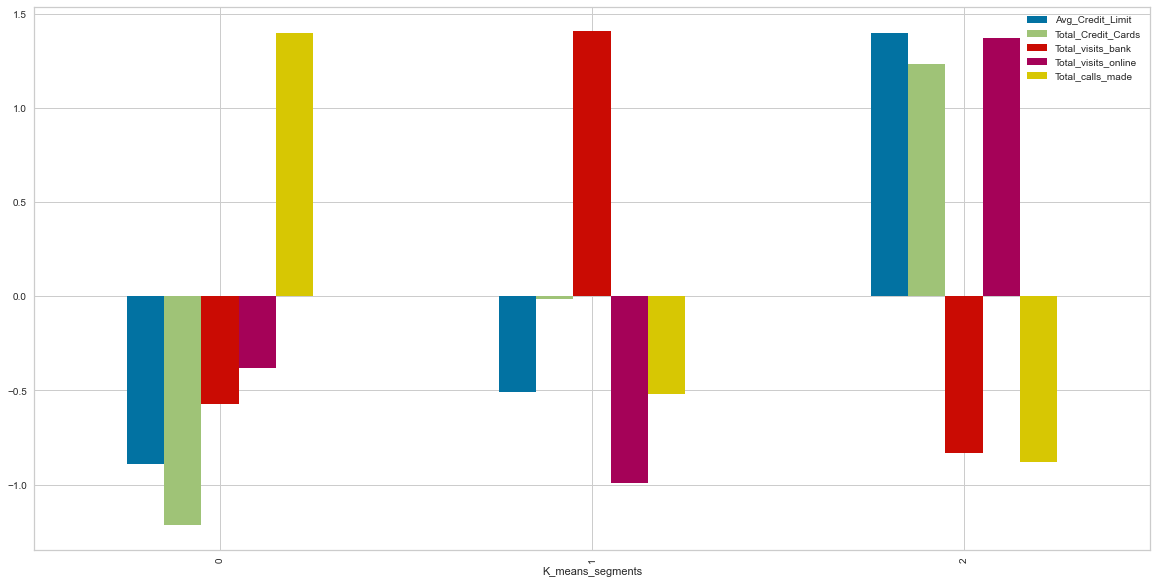

<IPython.core.display.Javascript object>

In [34]:
from scipy.stats import zscore

df.groupby("K_means_segments").mean().apply(zscore).plot.bar(figsize=(20, 10))

- This graph shows the relationship of variables of each segment compared to the mean.
* Cluster 0 - Avg credit limit, total credit cards, total visits to the bank and total visits online are below the mean and total calls made is close to 1.5 standard deviations above the mean.
* Cluster 1 - Total credit cards are close to the mean value. Avg credit limit, total visits online and total calls made are all below the mean by 0.5 standard deviations or more. Total visits to the bank are above the mean by nearly 1.5 standard deviations.
* Cluster 2 - Avg credit limit, total credit cards and total visits online are all above the mean, while total visits online and total calls made are below the mean.

### Insights 
**Cluster 0**
- The average credit limit is \$12,174.
- The average total credit cards is 2.4.
- The average visits to the bank is 0.9.
- Most customers have between 3 and 4 visits online.
- The customers made mostly made between 5 and 9 calls, with a median of 7.

**Cluster 1**
- The median average credit limit is about \$33,782.
- The customers have 5.5 credit cards.
- The customers make 3.5 visits to the bank.
- The median visits online is 1.
- The median calls made to the bank is 2.

**Cluster 2**
- The median average credit limit is \$141,040.
- The customers have an average of 8.7 credit cards.
- The customers make about 1 visit to the bank per year.
- The average online visits is 10.9.
- The median calls to the bank is 1.1.

In [35]:
kmeans1 = KMeans(n_clusters=4, random_state=1)
kmeans1.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [36]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans1.labels_

<IPython.core.display.Javascript object>

In [37]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [38]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [39]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,35904.522613,5.522613,2.477387,0.969849,2.075377,199
2,12167.420814,2.393665,0.927602,3.574661,6.923077,221
3,31226.315789,5.478947,4.515789,1.010526,1.936842,190


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

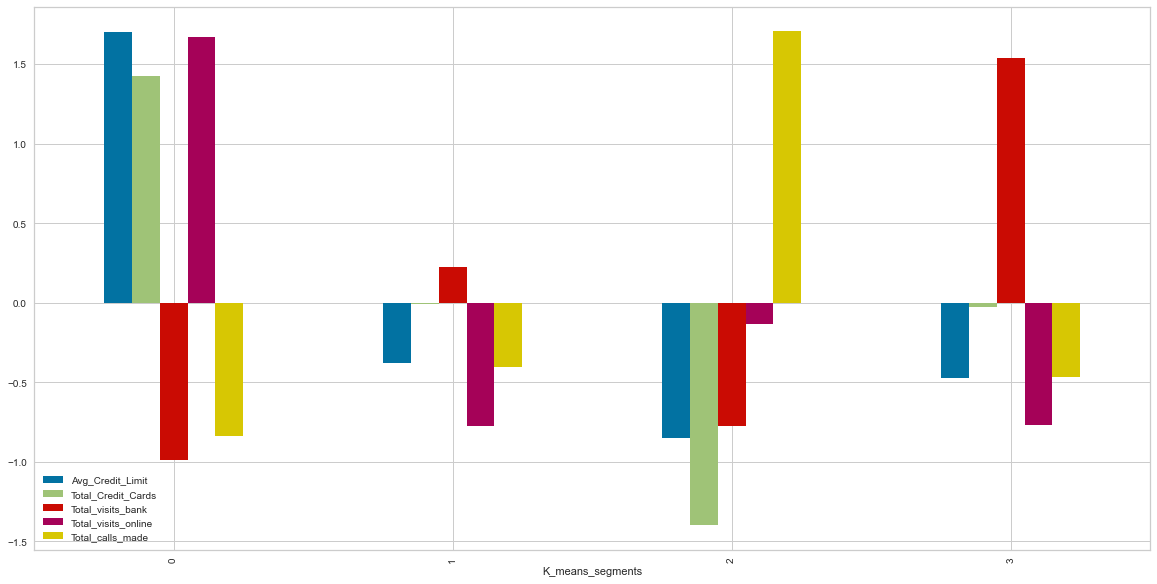

<IPython.core.display.Javascript object>

In [40]:
df.groupby("K_means_segments").mean().apply(zscore).plot.bar(figsize=(20, 10))

- This graph shows the same overall pattern for clusters 0-2. Cluster 3 is similar to cluster 1 with the biggest difference in the average visits to the bank. 

**Cluster 3** 

- The average credit limit is \$35,904.
- The average credit cards is 5.5.
- The average visits to the bank is 2.5.
- The average visits online is 1.
- The average calls made to the bank is 2.

## Insights

- We looked at segmenting with 3 or 4 clusters by the K-Means clustering. Three would be the optimal number of clusters. Segments 1 and 3 were extremely similar with the exception of total visits to the bank. This difference does not seem to be great enough to create a separate cluster.

## Hierarchical Clustering

In [41]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

<IPython.core.display.Javascript object>

In [42]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [43]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


<IPython.core.display.Javascript object>

In [44]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


<IPython.core.display.Javascript object>

#### Observations

- We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

**Let's see the dendrograms for the different linkage methods.**

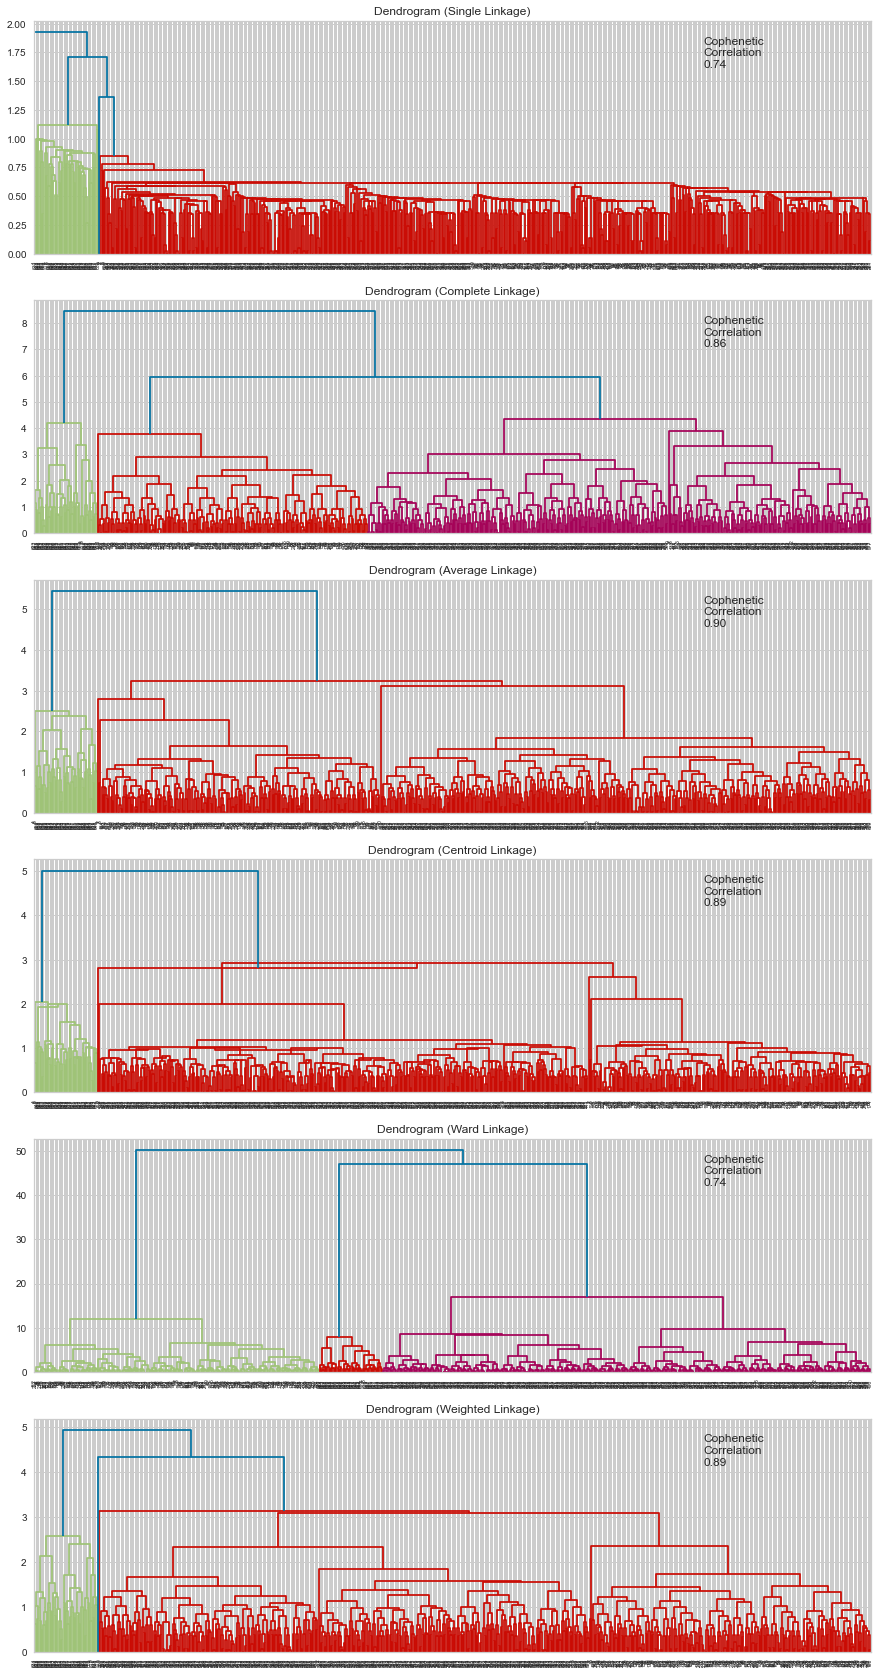

<IPython.core.display.Javascript object>

In [45]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])


- Dendrogram for Ward linkage shows distinct and separate clusters.

In [46]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


<IPython.core.display.Javascript object>

* Average linkage still has the highest cophenetic coefficient but ward linkage shows distinct clusters.

**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

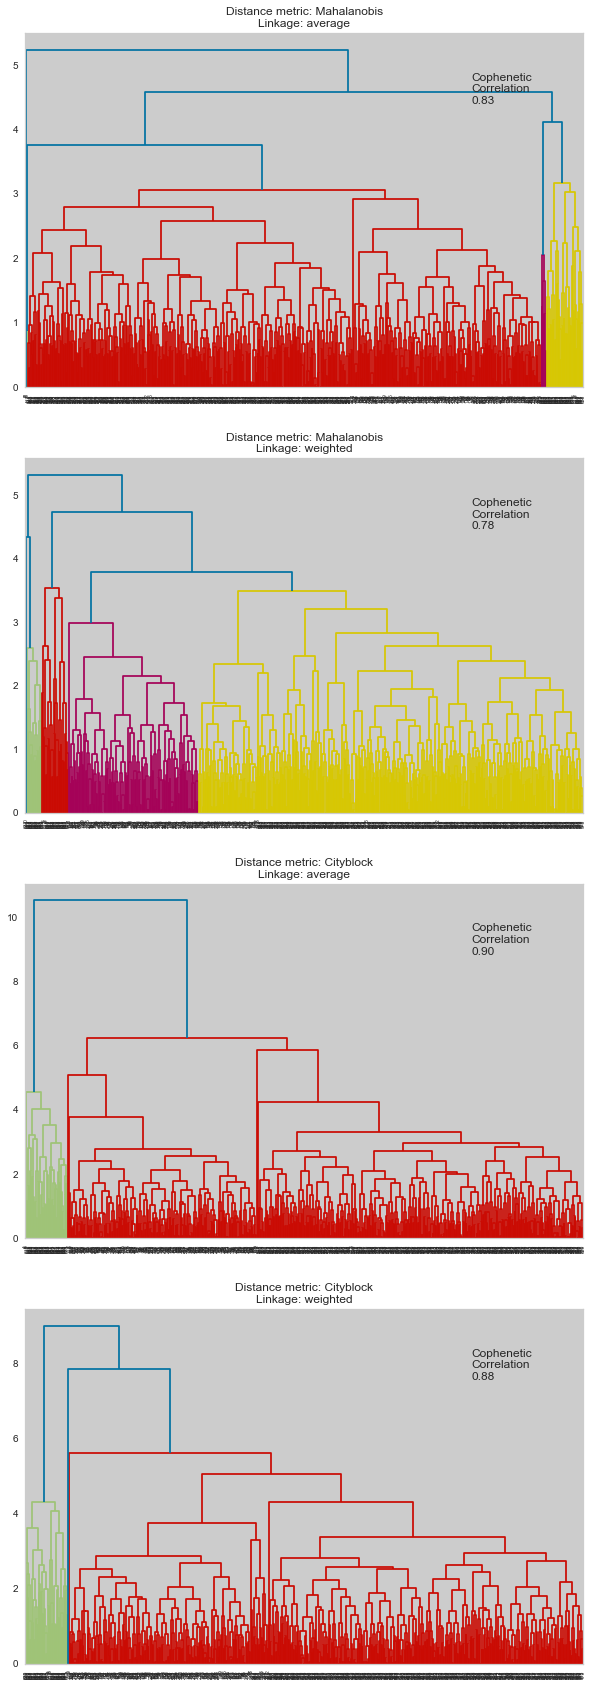

<IPython.core.display.Javascript object>

In [47]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

* Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
* 3 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.

**We will create 3 clusters using the *average linkage* since it gave the highest cophenetic correlation.**

In [48]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [49]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"].head(20)

0     0
1     2
2     0
3     0
4     1
5     2
6     1
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

## Cluster Profiling

In [50]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [51]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [52]:
# let's see the credit limits in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following credit limits are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()


In cluster 0, the following credit limits are present:
[100000  50000  30000  10000   8000  17000  19000  20000  13000  16000
  12000   5000   7000  11000   9000  18000   6000  15000  14000  73000
  49000  67000  61000  75000  48000  56000  72000  70000  51000  69000
  40000  44000  31000  37000  65000  46000  74000  58000  39000  52000
  33000  47000  71000  41000  59000  64000  45000  54000  66000  27000
  43000  36000  25000  57000  26000  38000  35000  34000  28000  63000
  29000  68000  42000  62000  32000  60000  55000]

In cluster 2, the following credit limits are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 1, the following credit limits are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 186000 183

<IPython.core.display.Javascript object>

In [53]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,1.981912,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,0.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.991031,223


<IPython.core.display.Javascript object>

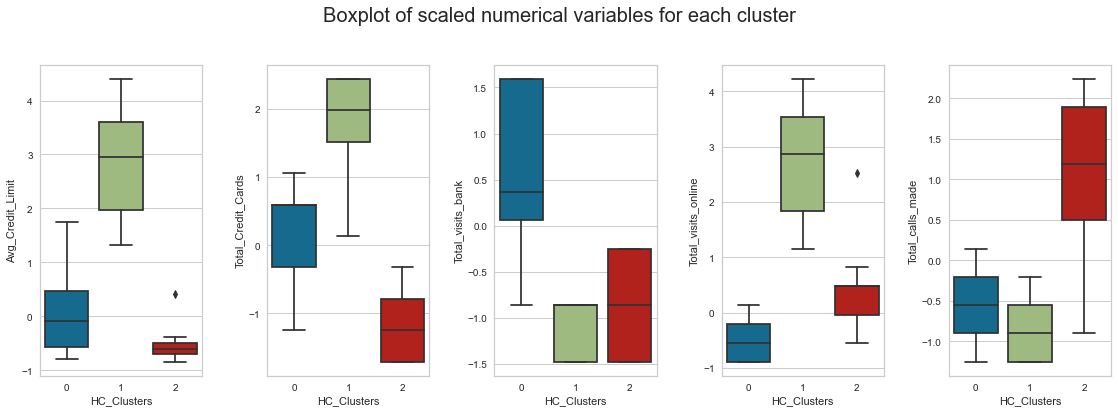

<IPython.core.display.Javascript object>

In [54]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights 
**Cluster 0**
- The average credit limit is \$33,713.
- The average total credit cards is 5.5.
- The average visits to the bank is 3.5.
- The average customer has 1 online visit.
- The customers made on average 2 calls.

**Cluster 1**
- The average credit limit is about \$141,040.
- The customers have an average of 8.7 credit cards.
- The customers make an average of 0.6 visits to the bank.
- The average visits online is 10.9.
- The average calls made to the bank is 1.

**Cluster 2**
- The average credit limit is \$12,197.
- The customers have an average of 2.4 credit cards.
- The customers make about 0.9 visit to the bank per year.
- The average online visits is 3.6.
- The average calls to the bank is 6.9.

**Let's look at the same model using 4 clusters.**

In [55]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [56]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"].head(20)

0     3
1     0
2     2
3     2
4     1
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

In [57]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [58]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [59]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,1.991031,223
1,141040.000000,8.740000,0.600000,10.900000,1.080000,0.000000,50
2,33541.450777,5.520725,3.492228,0.984456,2.010363,1.984456,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1


<IPython.core.display.Javascript object>

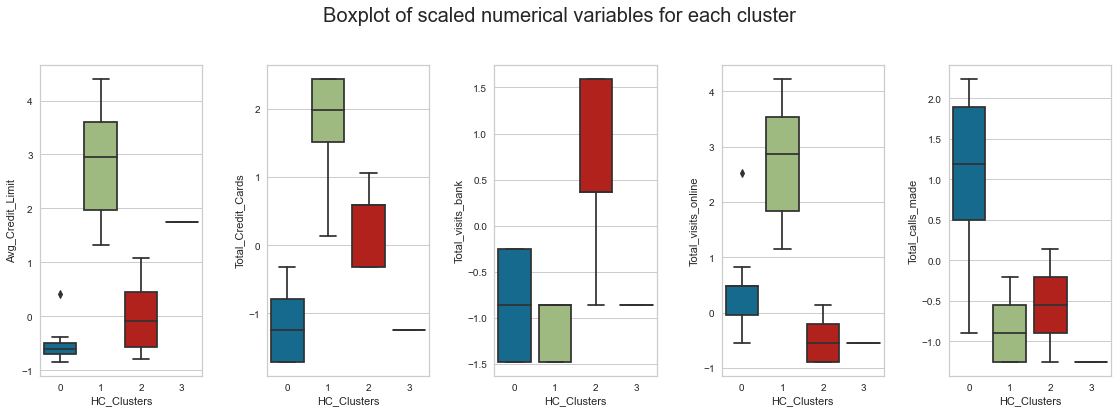

<IPython.core.display.Javascript object>

In [60]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Insights**
* For the average linkage, 3 clusters are better than 4 clusters because we end up with a cluster with only one profile.

**Cluster3**
- The average credit limit is $100,000.
- The customer has an average of 2 credit cards.
- The customer makes about 1 visit to the bank per year.
- The average online visits is 1.
- The average calls to the bank is 0.

**Let's try the same sequence with ward linkage.**

In [61]:
HCmodel1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel1.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [62]:
subset_scaled_df["HC_Clusters"] = HCmodel1.labels_
df["HC_Clusters"] = HCmodel1.labels_
df["HC_Clusters"].head(20)

0     0
1     1
2     0
3     0
4     2
5     1
6     2
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

In [63]:
cluster_profile1 = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [64]:
cluster_profile1["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [65]:
# let's see the names of the countries in each cluster
for cl1 in df["HC_Clusters"].unique():
    print("In cluster {}, the following credit limits are present:".format(cl1))
    print(df[df["HC_Clusters"] == cl1]["Avg_Credit_Limit"].unique())
    print()


In cluster 0, the following credit limits are present:
[100000  50000  30000  10000   8000  17000  19000  20000  13000  16000
  12000   5000   7000  11000   9000  18000   6000  15000  14000  73000
  49000  67000  61000  75000  48000  56000  72000  70000  51000  69000
  40000  44000  31000  37000  65000  46000  74000  58000  39000  52000
  33000  47000  71000  41000  59000  64000  45000  54000  66000  27000
  43000  36000  25000  57000  26000  38000  35000  34000  28000  63000
  29000  68000  42000  62000  32000  60000  55000]

In cluster 1, the following credit limits are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 2, the following credit limits are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 186000 183

<IPython.core.display.Javascript object>

In [66]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,1.981912,387
1,12197.309417,2.403587,0.928251,3.560538,6.883408,1.991031,223
2,141040.000000,8.740000,0.600000,10.900000,1.080000,0.000000,50


<IPython.core.display.Javascript object>

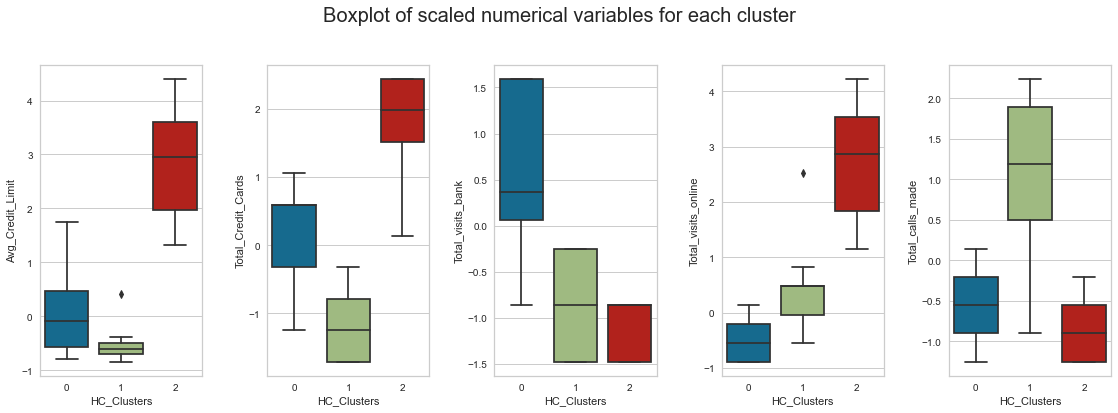

<IPython.core.display.Javascript object>

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights 
**Cluster 0**
- The average credit limit is \$33,713.
- The average total credit cards is 5.5.
- The average visits to the bank is 3.5.
- The average customer has 1 online visit.
- The customers made on average 2 calls.

**Cluster 1**
- The average credit limit is \$12,197.
- The customers have an average of 2.4 credit cards.
- The customers make about 0.9 visit to the bank per year.
- The average online visits is 3.6.
- The average calls to the bank is 6.9.

**Cluster 2**
- The average credit limit is about \$141,040.
- The customers have an average of 8.7 credit cards.
- The customers make an average of 0.6 visits to the bank.
- The average visits online is 10.9.
- The average calls made to the bank is 1.

In [68]:
HCmodel2 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel2.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [69]:
subset_scaled_df["HC_Clusters"] = HCmodel2.labels_
df["HC_Clusters"] = HCmodel2.labels_
df["HC_Clusters"].head(20)

0     1
1     0
2     1
3     1
4     2
5     0
6     2
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
cluster_profile2 = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [71]:
cluster_profile2["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [72]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following credit limits are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()


In cluster 1, the following credit limits are present:
[100000  50000  30000  10000   8000  19000  13000  16000  20000   5000
  18000  12000  14000   7000  17000   6000  11000  15000   9000  49000
  67000  61000  75000  56000  72000  70000  51000  73000  69000  40000
  65000  48000  46000  74000  39000  52000  47000  71000  59000  64000
  45000  54000  31000  66000  27000  36000  25000  57000  35000  26000
  38000  34000  58000  68000  42000  33000  62000  29000  37000  32000
  60000  44000  55000  63000]

In cluster 0, the following credit limits are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 2, the following credit limits are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 186000 183000 111000 112000 132

<IPython.core.display.Javascript object>

In [73]:
# let's display cluster profiles
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,1.991031,223
1,37520.408163,5.642857,2.525510,0.974490,2.142857,1.071429,196
2,141040.000000,8.740000,0.600000,10.900000,1.080000,0.000000,50
3,29806.282723,5.376963,4.471204,0.994764,1.863874,2.916230,191


<IPython.core.display.Javascript object>

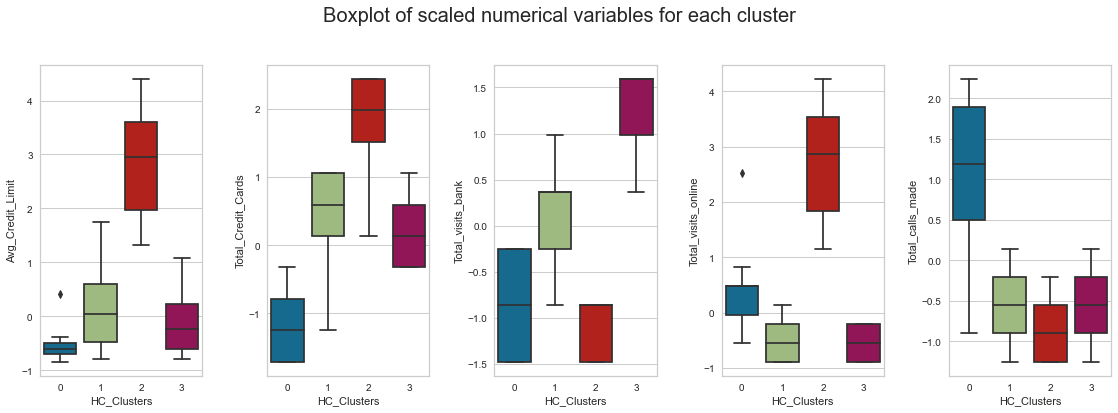

<IPython.core.display.Javascript object>

In [74]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights 

**Cluster 0**
- The average credit limit is \$12,197.
- The customers have an average of 2.4 credit cards.
- The customers make about 0.9 visit to the bank per year.
- The average online visits is 3.6.
- The average calls to the bank is 6.9.

**Cluster 1**
- The average credit limit is \$37,520.
- The average total credit cards is 5.6.
- The average visits to the bank is 2.5.
- The average customer has 1 online visit.
- The customers made on average 2 calls.

**Cluster 2**
- The average credit limit is about \$141,040.
- The customers have an average of 8.7 credit cards.
- The customers make an average of 0.6 visits to the bank.
- The average visits online is 10.9.
- The average calls made to the bank is 1.

**Cluster 3**
- The average credit limit is \$29,806.
- The average total credit cards is 5.3.
- The average visits to the bank is 4.4.
- The average customer has 1 online visit.
- The customers made on average 2 calls.

## Conclusion

- We verified through K-Means and  Hierarchical Clustering with both average and ward linkage, that the appropriate number of clusters was 3. All methods provided us segments with a highly similar breakdown. The Final Cluster Segmentation is the HC cluster with ward linkage.
- Customers in the higher credit limit (\$140,000) cluster tend to have several credit cards and rarely call or visit the bank. These would be more internet savvy customers who do their business mostly online with is backed up by the average of 11 online visits annually.
- The next segment has about \$33,700 in credit limit over 5.5 cards. These customers prefer to visit the bank or call. They use the online banking minimally.
- The final segment has a credit limit of about \$12,000 with about 2.4 cards. They prefer to call the bank to handle business or go online. They rarely visit the bank in person. 

**FINAL CLUSTER SEGMENTATION**

**Cluster 0**
- The average credit limit is \$33,713.
- The average total credit cards is 5.5.
- The average visits to the bank is 3.5.
- The average customer has 1 online visit.
- The customers made on average 2 calls.

**Cluster 1**
- The average credit limit is \$12,197.
- The customers have an average of 2.4 credit cards.
- The customers make about 0.9 visit to the bank per year.
- The average online visits is 3.6.
- The average calls to the bank is 6.9.

**Cluster 2**
- The average credit limit is about \$141,040.
- The customers have an average of 8.7 credit cards.
- The customers make an average of 0.6 visits to the bank.
- The average visits online is 10.9.
- The average calls made to the bank is 1.

## Business Recommendations

- Market new exclusive credit cards to Cluster 0 customers. Give them an incentive to come into the bank to receive a gift with opening the credit card in person. Cross sell other banking products such as home equity loans, car loans, etc.
- Preemptively review the accounts of Cluster 1 customers. Look for any discrepancies and opportunities to call them before they call the bank. In addition, send marketing to show them how to get questions answered online or via an app.
- Cluster 0 is our biggest group or average customer. They should be sent marketing to boost the online presence, by downloading the bank app and letting them know what features the online banking hold. In addition, they could need other services such as mortgages, home equity loans, and parent loans for college aged children.  